## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [2]:
import pandas as pd

df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


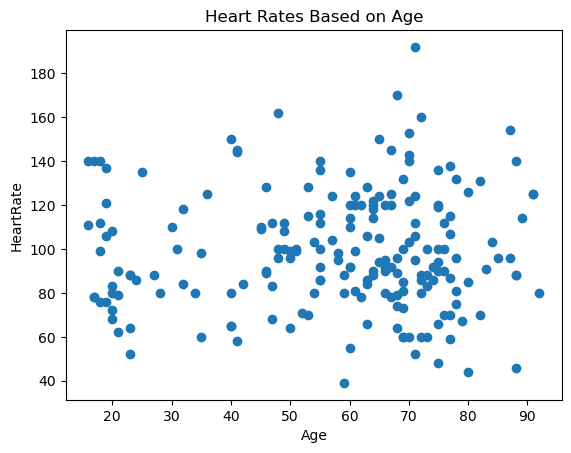

In [3]:
# Example 1: Age
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(df["Age"], df["HeartRate"])
plt.xlabel("Age")
plt.ylabel("HeartRate")
plt.title("Heart Rates Based on Age")
plt.show()

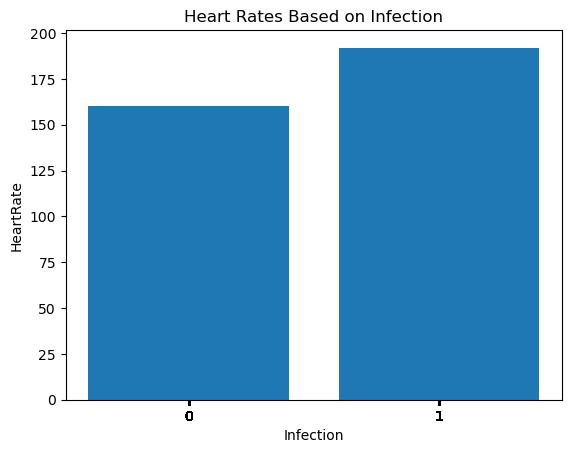

In [4]:
# Example 2: Infection
plt.bar(df["Infection"], df["HeartRate"])
plt.xlabel("Infection")
plt.ylabel("HeartRate")
plt.title("Heart Rates Based on Infection")
plt.xticks(df["Infection"])
plt.show()

In [5]:
# Professor's Examples:
# Example 1: Distribution about target value
# Example 2: scatter plot of heart rate vs something : 
# (either 1. variable you believe is important or 2. variable that gave a trend)
# Example 3: same as 2


### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot (other options: sankey and treemap)

#### One categorical: bar plot

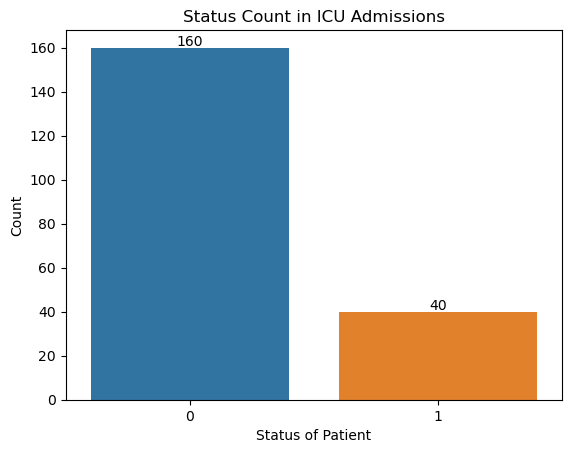

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "Status", data = df)
plt.xlabel("Status of Patient")
plt.ylabel("Count")
plt.title("Status Count in ICU Admissions")

# showing value counts above bar graph
status_counts = df['Status'].value_counts()
for i, value in enumerate(status_counts.values):
    plt.text(i, value+1, f'{value}', ha= 'center')
plt.show()

Text(0.5, 1.0, 'Status Percentage in ICU Admissions')

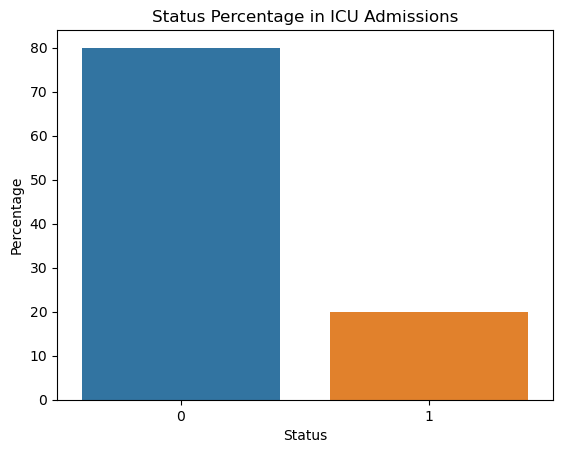

In [7]:
# this gives percentage of value counts
status_counts=df['Status'].value_counts(normalize=True)*100
status_counts

sns.barplot(x=status_counts.index, y=status_counts.values)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Status Percentage in ICU Admissions')

##### What to write about a bar plot

- what this plot is about (what feature or variable you're plotting)
- percentage/count for each group
- whether there is a clear difference on the percentage/count


EX. The figure is about the number of people who survived in ICU Admissions. Status '0' means the patient survived, while Status '1' means the patient passed away in the ICU. Among 200 patients, 160 (80%) survived and 40 (20%) died. There are more people who survived in the ICU than those who died.

#### One continous: histogram/density plot/boxplot

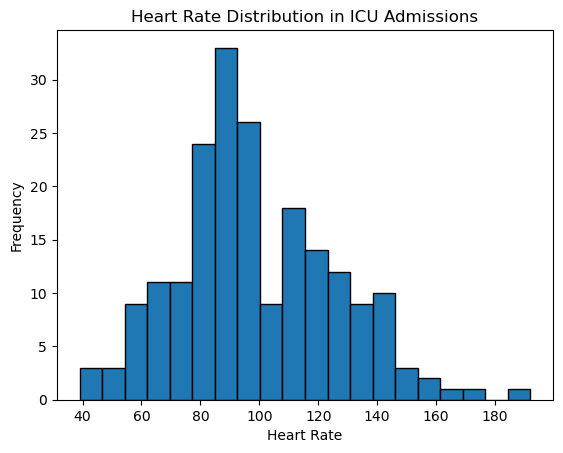

In [8]:
plt.hist(df['HeartRate'], bins=20, edgecolor='black')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

C:\Users\yayac\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


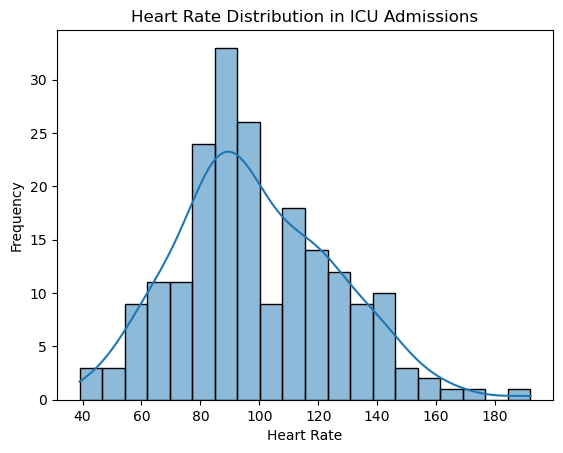

In [9]:
sns.histplot(df['HeartRate'],kde=True,bins=20)
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

C:\Users\yayac\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


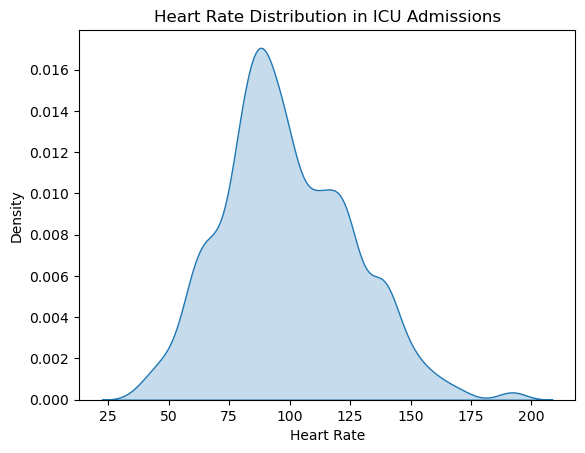

In [10]:
# Density plot
sns.kdeplot(df['HeartRate'], bw_adjust=.6, fill=True) #bandwidth can be between 0 and 1
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

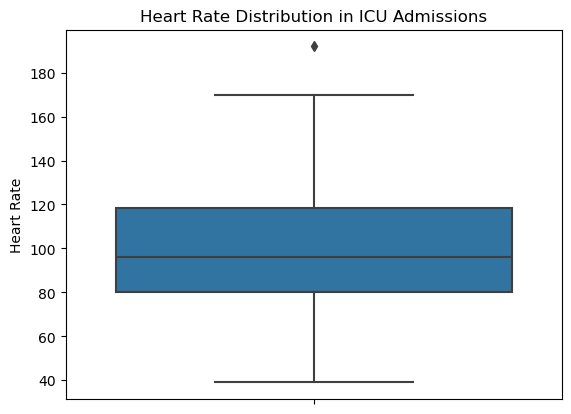

In [11]:
# Box plot
sns.boxplot(y="HeartRate", data=df) # y is vertical, x is horizontal box plot
plt.ylabel('Heart Rate')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

In [12]:
df['HeartRate'].describe()

count    200.00000
mean      98.92500
std       26.82962
min       39.00000
25%       80.00000
50%       96.00000
75%      118.25000
max      192.00000
Name: HeartRate, dtype: float64

##### Difference between histogram/density plot/ boxplot

- Histogram and density plot emphasize **distribution of data**
- Boxplot makes the assumption that the data follows a **normal distribution**, however **boxplot will emphasize more statistics** information (median, IQR, std, range, etc)
- Boxplot cannot catch distribution information such as bi-mode, but also no parameters needed like bins or bandwidth
- Histogram needs to choose parameters like bin number and density plots need to choose bandwidth
- If you have multiple groups, boxplot and density plots can easily show the things side-by-side while histogram is hard to overlap with each other

##### Difference between histogram and bar plot

- Histogram is for numerical feature and bar plot is for categorical
- More common for bar plots to be presented horizontally (histograms are almost always vertical)
- Histogram doesn't have spaces between bins to show continuity, but bar plots usually will have spaces between categories
- Histogram cannot switch order of bins, while barplots can decide the order of the bars because they're categorical


##### What to write about a histogram/density plot

- what is the plot about?
- shape (skewness and mode)
- majority of data (typical value = mean $\pm$ sd)
- potential outlier (if negatively skewed then probably a small outlier, if positively skewed then probably high outlier)
<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

EX. The figure is a distribution of heart rate in ICU Admissions. The heart rate has a uni-mode distribution and it is slightly skewed to the right (positive), indicating there may be a potential high outlier. THe typical value is within the range of 98.9 $\pm$ 26.8.

##### What to write about a box plot

- What is the plot about?
- can comment on skewness, but **not the mode**
- report majority of data as the IQR
- potential outliers

EX. This figure is a boxplot of heart rate in ICU admissions. The distribution is slightly skewed to the right and may have a potential large outlier. The IQR range is from 

#### Two continous: scatter plot

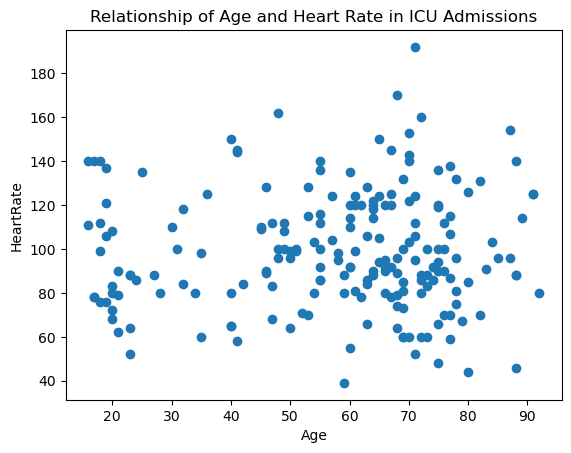

In [13]:
plt.scatter(df['Age'],df['HeartRate'])
plt.xlabel('Age')
plt.ylabel('HeartRate')
plt.title('Relationship of Age and Heart Rate in ICU Admissions')
plt.show()

Text(0, 0.5, 'HeartRate')

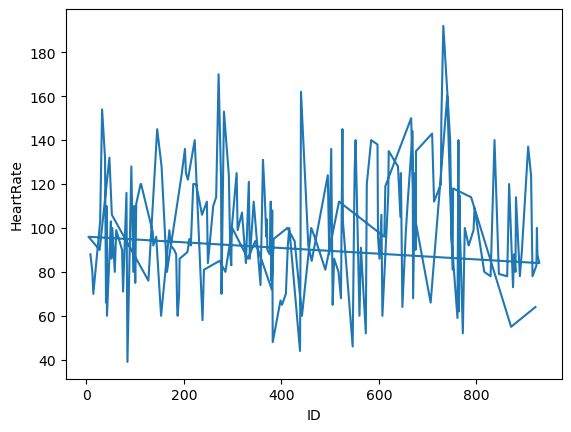

In [14]:
# Line plot
plt.plot(df['ID'],df['HeartRate'])
plt.xlabel('ID')
plt.ylabel('HeartRate')

##### What to write about a scatter plot

- What is the plot about?
- Identify the trend (linear or non-linear) in scatter plot
- Any outliers or clusters


EX. The figure shows a relationship between Age and Heart rate in ICU admissions. There is no clear trend, linear or non-linear. There is also no clear outlier. There may be a cluster for patients aged between 60-80 and a heart rate of 80-120.

#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side histogram and side-by-side density plot

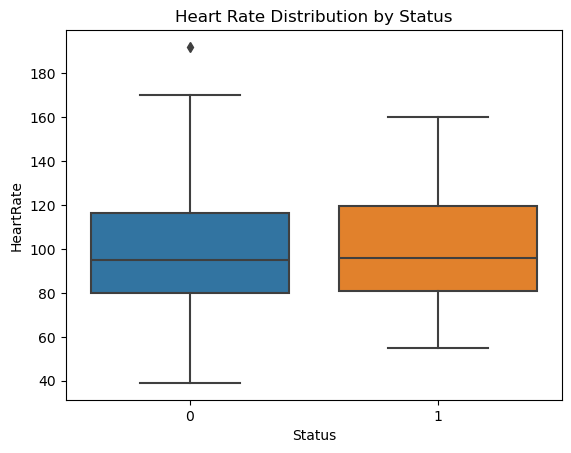

In [15]:
# Side by side Box plot
sns.boxplot(x='Status', y='HeartRate',data=df) # y is vertical, x is horizontal box plot
plt.title('Heart Rate Distribution by Status')
plt.show()

C:\Users\yayac\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yayac\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\yayac\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


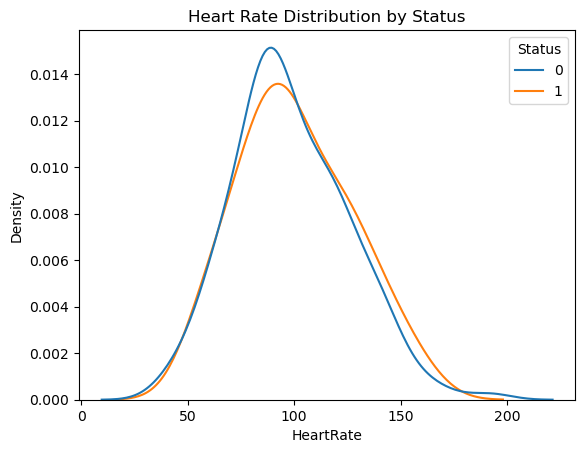

In [16]:
# Side by side density plot
sns.kdeplot(x='HeartRate', hue='Status',data=df, common_norm = False) # y is vertical, x is horizontal box plot
plt.ylabel('Density')
plt.xlabel('HeartRate')
plt.title('Heart Rate Distribution by Status')
plt.show()

##### What to write about a side-by-side boxplot or density plot

- what is the plot about
- highlight comparison
- **for box plot, declare whether box parts are overlapped**


Side-by-side Boxplot EX. The figure is a side-by-side boxplot for heart rate vs. status. The boxes are overlapped which means there may not be a significant difference between the two groups on heart rate distribution. 

#### Two categorical: side-by-side bar plot

Text(0.5, 1.0, 'Side by side Bar Plot for CPR and Status')

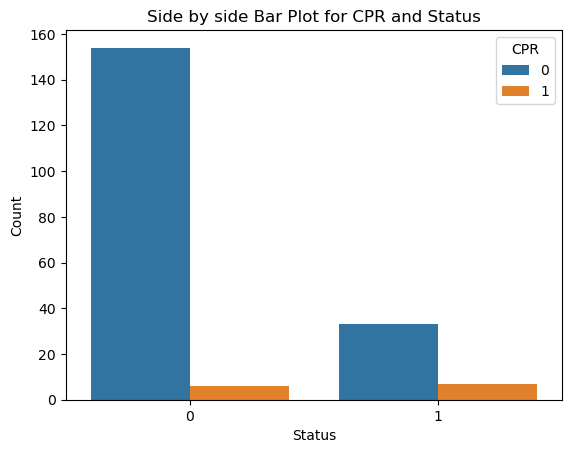

In [17]:
# CPR vs Status
df['CPR'] = df['CPR'].astype('string')
sns.countplot(x='Status',hue='CPR',data=df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Side by side Bar Plot for CPR and Status')

In [18]:
# Proportion side by side plot
# Normalize all = add all groups together will equal 1
proportion_table = pd.crosstab(df['Status'],df['CPR'],normalize='all')
# Normalize index will total by group, so each status group will equal 1
proportion_table_index = pd.crosstab(df['Status'],df['CPR'],normalize='index')
# No normalize will only give count
proportion_table

CPR,0,1
Status,,
0,0.770,0.030
1,0.165,0.035


Text(0.5, 1.0, 'Stacked Bar Plot for Status by CPR')

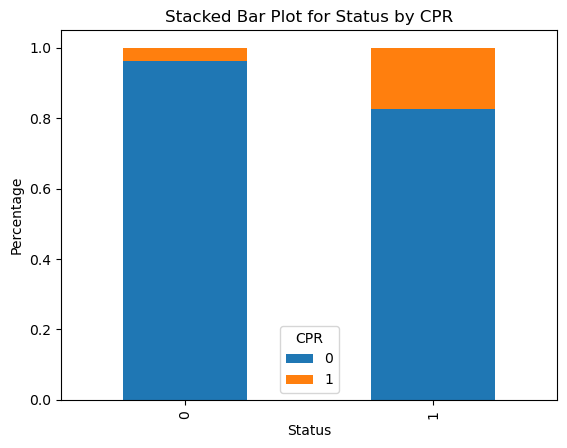

In [19]:
proportion_table_index.plot(kind='bar',stacked=True)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Stacked Bar Plot for Status by CPR')

##### What to write about a side-by-side bar plot

- What is the plot about
- Highlight comparison

EX. The figure is a stacked bar plot for status vs CPR. The color indicates whether the patient had CPR performed. It seems that the distribution of CPR use is different for survival vs non survival group. In the survival group, there is a much larger proportion that did not have CPR performed on them.

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [20]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


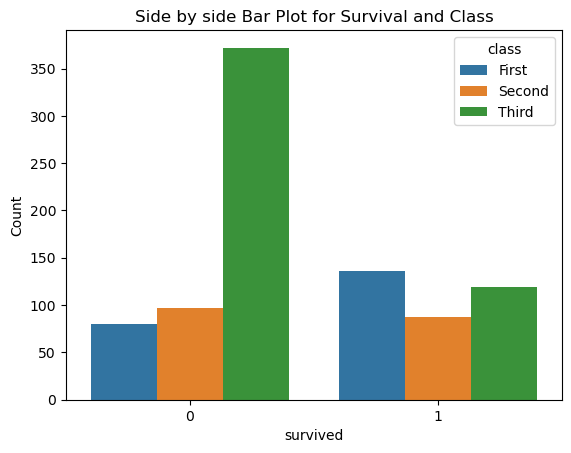

In [21]:
# Survived vs Class (Two categorical)
sns.countplot(x='survived',hue='class',data=titanic_data)
plt.xlabel('survived')
plt.ylabel('Count')
plt.title('Side by side Bar Plot for Survival and Class')
plt.show()

The figure is a side-by-side bar plot for the count of passengers survived in each class. The color indicates which class the passenger was. It seems that among those who did not survive (0), an overwhelming majority of them were Third Class passengers. Of those who did survive (1), First Class passengers had the most. 

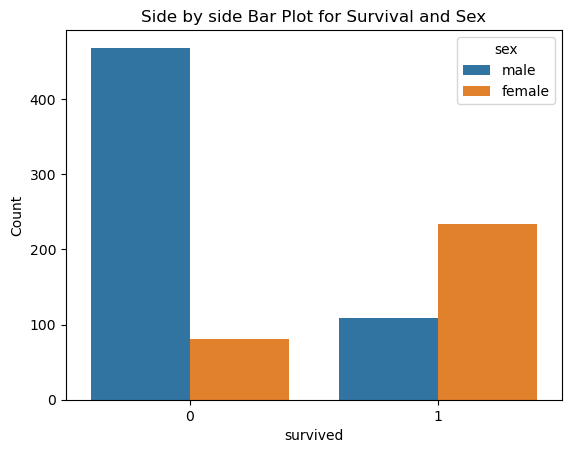

In [25]:
# Survived vs Who (Two Categorical)
sns.countplot(x='survived',hue='sex',data=titanic_data)
plt.xlabel('survived')
plt.ylabel('Count')
plt.title('Side by side Bar Plot for Survival and Sex')
plt.show()

The figure is a side-by-side bar plot for the count of passengers survived as males or females. The color indicates the sex of the passenger. From this visualization, we see that those passengers who died there is a much higher number of males than females. In those that survived, there are about double the amount of females than males.

C:\Users\yayac\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yayac\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


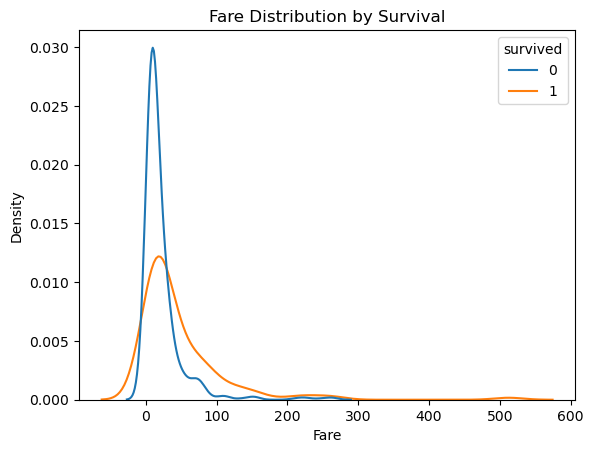

In [23]:
# Survival vs Fare
# Side by side density plot
sns.kdeplot(x='fare', hue='survived',data=titanic_data, common_norm = False) # y is vertical, x is horizontal box plot
plt.ylabel('Density')
plt.xlabel('Fare')
plt.title('Fare Distribution by Survival')
plt.show()

The figure is a side-by-side density plot of survival of passengers and their fares. For the passengers that died, it seems that most of them had very low fares. In those that survived, their fares were slightly higher.

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?